In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn


### TotalGHGEmissions Prediction by Multiple Linear Regression

In [3]:
TE2 = pd.read_csv('TE2.csv')

In [4]:
TE2.columns

Index(['Unnamed: 0', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)',
       'Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'BALLARD', 'CENTRAL', 'DELRIDGE', 'DOWNTOWN', 'EAST', 'GREATERDUWAMISH',
       'LAKEUNION', 'MAGNOLIAQUEENANNE', 'NORTH', 'NORTHEAST', 'NORTHWEST',
       'SOUTHEAST', 'SOUTHWEST'],
      dtype='object')

In [5]:
X = TE2[['YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'BALLARD', 'CENTRAL', 'DELRIDGE', 'DOWNTOWN', 'EAST', 'GREATERDUWAMISH',
       'LAKEUNION', 'MAGNOLIAQUEENANNE', 'NORTH', 'NORTHEAST', 'NORTHWEST',
       'SOUTHEAST', 'SOUTHWEST' ]]
y = TE2[['TotalGHGEmissions']]

In [72]:
X.head(3)

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,Campus,NonResidential,Nonresidential COS,SPS-District K-12,BALLARD,CENTRAL,...,DOWNTOWN,EAST,GREATERDUWAMISH,LAKEUNION,MAGNOLIAQUEENANNE,NORTH,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST
0,-1.121080,0.077448,1.889896,-0.078336,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.036172,0.077448,1.657727,0.052623,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.535940,0.077448,3.282907,0.193897,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)

In [29]:
R2_LR = r2_score(y_test, y_pred)

In [30]:
print('R2 score for LR' ,R2_LR)

R2 score for LR 0.2514510475522096


### DummyRegressor 

In [18]:
from sklearn.dummy import DummyRegressor


lr_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
  
lr_dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)
y_predict = lr.predict(X_test)
y_predict_dummy_mean = lr_dummy_mean.predict(X_test)
y_predict_dummy_median = lr_dummy_median.predict(X_test)

In [19]:
print('Linear model, coefficients: ', lr.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
  
print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(y_test, 
                                                                    y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(median_absolute_error(y_test, y_predict)))
  
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(r2_score(y_test, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [[ -3.3413845   -1.51162974  14.44143638  72.57304723  -3.47536518
   -3.54482852  -8.99397619  16.0141699   -8.06578915  15.66612662
   11.92941336   7.53196384  -0.90633698 -12.79707953  -4.18450067
    5.40567018  -0.49201677  -0.57292548  -2.91343736  -1.33176794
   -9.26932013]]
Mean squared error (dummy): 22813.13
Mean squared error (linear model): 17076.70
Median absolute error (dummy): 33.78
Median absolute error (linear model): 44.75
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.14
r2_score (linear model): 0.25


### Lasso Regression : 

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

def train_eval_perf(model, params, X_train, y_train, X_test, y_test):
    gd = GridSearchCV(model, params, cv=5)
    gd.fit(X_train, y_train)

    preds = gd.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mae = median_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    return gd.best_params_, mse, mae, r2, gd.best_estimator_

In [33]:
params = {'alpha': np.logspace(-3, 3, 10)}
model = Lasso()

lasso_model = train_eval_perf(model, params, X_train, y_train, X_test, y_test)[-1]

In [34]:
lasso_model.coef_

array([-0.        , -0.        , 10.09245799, 65.97736405, -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ])

In [73]:
lsr = Lasso()
Lasso_CV = GridSearchCV(model, params, cv=5)

In [75]:
Lasso_CV.fit(X_train, y_train)
y_pred_LsR = Lasso_CV.predict(X_test)

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.862e+06, tolerance: 2.231e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.115e+06, tolerance: 2.846e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.115e+06, tolerance: 2.846e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+06, tolerance: 2.793e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+06, tolerance: 2.793e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.673e+05, tolerance: 3.019e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.673e+05, tolerance: 3.019e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.241e+05, tolerance: 2.665e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.241e+05, tolerance: 2.665e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.862e+06, tolerance: 2.231e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.862e+06, tolerance: 2.231e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+06, tolerance: 2.846e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.695e+05, tolerance: 2.846e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+06, tolerance: 2.793e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+06, tolerance: 2.793e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.673e+05, tolerance: 3.019e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+06, tolerance: 2.231e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.695e+05, tolerance: 2.846e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+06, tolerance: 2.231e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.695e+05, tolerance: 2.846e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.004e+05, tolerance: 2.231e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.674e+05, tolerance: 3.019e+03
  model = cd_fast.enet_coordinate_descent(
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [76]:
R2_LsR = r2_score(y_test, y_pred_LsR)

In [77]:
print(R2_LsR)

0.2506983459820509


### Ridge Regression

In [59]:
from sklearn.linear_model import Ridge


ridge_reg = Ridge()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1,0.1,0.01,0.001,0.0001,0] ,
                "fit_intercept": [True, False],
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

Ridge_CV = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_CV.fit(X_train,y_train)
Ridge_CV.best_params_



/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.21245e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.62826e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.71642e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.47968e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/demid/opt/anaconda3/lib/pytho

{'alpha': 10, 'fit_intercept': False}

In [60]:
y_pred_RR = Ridge_CV.predict(X_test)

In [61]:
R2_RR = r2_score(y_test, y_pred_RR)

In [62]:
print(R2_RR)

0.24727270544563473


### KNeighbor Regressor

In [64]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [65]:
knn.score(X_test, y_test)

0.25815199357076346

In [69]:
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors': [2,3,5,7,9,11]}
score = 'accuracy'

clf = model_selection.GridSearchCV(
        neighbors.KNeighborsRegressor(),
        param_grid,
        cv=5,
        scoring=score
)

clf.fit(X_train, y_train)
print('Best parameters:')
print(clf.best_params_)

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sk

Best parameters:
{'n_neighbors': 2}


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sk

In [70]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)


0.23419718132386536

In [71]:
y_pred_kn = knn.predict(X_test)
print('RMSE for KNN : {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
R2_KN = r2_score(y_test, y_pred_kn)
print('R2 score for KNN' ,R2_KN)

RMSE for KNN : 130.62
R2 score for KNN 0.23419718132386536


### DecisionTree Regressor 

In [78]:
from sklearn.tree import DecisionTreeRegressor 

dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [79]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt, X_test, y_test, cv=10)

array([-0.03337926,  0.08463726,  0.07601241, -0.50052412,  0.08677273,
       -0.06333522,  0.16043954, -0.91589348, -0.61877094, -0.15812158])

In [80]:
y_pred = dt.predict(X_test)

In [81]:
print('R^2:', metrics.r2_score(y_test, y_pred))

R^2: 0.26938476086662955


In [88]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}


In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}


In [90]:
dt_random = RandomizedSearchCV(
    estimator = dt, 
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=2,
    random_state=42,
    n_jobs = -1      )# Fit the random search model
dt_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [91]:
y_pred_dt = dt_random.predict(X_test)
y_pred_base = dt.predict(X_test)

In [92]:
R2_DT = metrics.r2_score(y_test, y_pred_dt)

In [95]:
print('R^2_base:', metrics.r2_score(y_test, y_pred_base))
print('R2_DT:', R2_DT)


R^2_base: 0.26938476086662955
R2_DT: 0.21314009418007862


In [33]:
from matplotlib import pyplot as plt
from sklearn import tree

In [ ]:
from sklearn import tree
from sklearn import tree
import graphviz
from dtreeviz.trees import *
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regressor, X_train, y_train,
                target_name='TotalGHGEmissions',
                feature_names=TE2.feature_names,
                class_names=list(TE2.target_names))

viz


### Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [109]:
rf.fit(X_train, y_train)

/var/folders/zm/r71zpx_j4y149h6k04j7qqsr0000gn/T/ipykernel_7263/2725846524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [98]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [99]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [105]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [106]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [110]:
y_pred_base = rf.predict(X_test)

In [111]:
y_pred_rf = rf_random.predict(X_test)

R2_RF = metrics.r2_score(y_test, y_pred_rf)

In [112]:
print('R^2_base:', metrics.r2_score(y_test, y_pred_base))
print('R^2 RF:', R2_RF)


R^2_base: 0.5261399326210889
R^2 RF: 0.4950615324032255


### XGBoost

In [113]:
import xgboost as xgb
from xgboost import XGBRegressor

In [114]:
from sklearn.model_selection import cross_val_score

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [115]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [116]:
xg_reg.fit(X_train,y_train)

[08:42:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=12,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [117]:
y_pred_base_xgb = xg_reg.predict(X_test)

In [21]:
from sklearn import metrics

In [118]:
R2_XGB_base = metrics.r2_score(y_test, y_pred_base_xgb)

In [119]:
print('R^2_base XGB:', metrics.r2_score(y_test, y_pred_base_xgb))

R^2_base: 0.21547399093380715


In [108]:
pprint(xg_reg.get_params())

{'alpha': 10,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.3,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 10,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'objective': 'reg:linear',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 10,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}


### R2 Visualization

In [151]:
R2_dict = { 'Regression' : ["Linear Regression", "Ridge Regression", "Lasso Regression",
                            "Decision Tree" , "Random Forest","XGBoost_base", "XGBoost rand"],
        "R2": [R2_LR, R2_RR, R2_LsR, R2_DT, R2_RF, R2_XGB_base, R2_random_xgb]
}

In [152]:
R2_df = pd.DataFrame(R2_dict)

In [153]:
R2_df

,Regression,R2
0,Linear Regression,0.251451
1,Ridge Regression,0.247273
2,Lasso Regression,0.250698
3,Decision Tree,0.213140
4,Random Forest,0.495062
5,XGBoost_base,0.215474
6,XGBoost rand,-0.458183


<AxesSubplot:xlabel='Regression'>

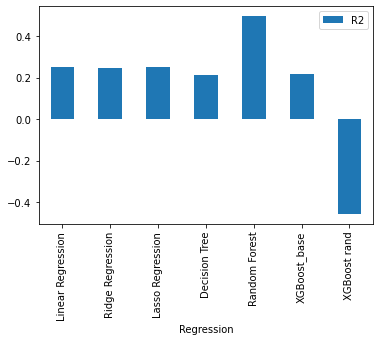

In [154]:
import matplotlib as plt

R2_df.plot(x = 'Regression', y = 'R2', kind = 'bar' )

In [144]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [10, 50, 100]}



In [145]:
clf = xgb.XGBClassifier()

In [146]:
random_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            #fit_params=fit_params,
                            scoring='neg_log_loss',
                            #refit=False,
                                random_state=42)

In [131]:
#random_clf.best_params_


In [147]:
random_clf.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[08:58:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

[CV] END colsample_bylevel=0.9, colsample_bytree=0.4, gamma=0.5, learning_rate=0, max_depth=6, min_child_weight=5.0, n_estimators=10, reg_lambda=100.0, silent=False, subsample=0.9; total time=   0.7s
[08:58:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.4, gamma=0.5, learning_rate=0, max_depth=6, min_child_weight=5.0, n_estimators=10, reg_lambda=100.0, silent=False, subsample=0.9; total time=   0.7s
[08:58:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.5, learning_rate=0.001, max_depth=6, min_child_weight=0.5, n_estimators=50, reg_lambda=5.0, silent=False, subsample=0.8; total time=   4.7s
[08:58:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.5, learning_rate=0.001, max_depth=6, min_child_weight=0.5, n_estimators=50, reg_lambda=5.0, silent=False, subsample=0.8; total time=   4.9s
[08:58:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.4, gamma=1.0, learning_rate=0.01, max_depth=20, min_child_weight=10.0, n_estimators=100, reg_lambda=0.1, silent=False, subsample=0.5; total time=   6.4s
[08:58:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.4, gamma=1.0, learning_rate=0.01, max_depth=20, min_child_weight=10.0, n_estimators=100, reg_lambda=0.1, silent=False, subsample=0.5; total time=   6.6s
[08:58:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1.0, n_estimators=100, reg_lambda=10.0, silent=False, subsample=0.9; total time=   6.5s
[08:58:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1.0, n_estimators=100, reg_lambda=10.0, silent=False, subsample=0.9; total time=   6.5s
[08:58:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.7, colsample_bytree=1.0, gamma=0, learning_rate=3, max_depth=6, min_child_weight=1.0, n_estimators=50, reg_lambda=10.0, silent=False, subsample=1.0; total time=   3.5s
[08:58:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.7, colsample_bytree=1.0, gamma=0, learning_rate=3, max_depth=6, min_child_weight=1.0, n_estimators=50, reg_lambda=10.0, silent=False, subsample=1.0; total time=   3.5s
[08:58:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, gamma=1.0, learning_rate=0.001, max_depth=15, min_child_weight=1.0, n_estimators=10, reg_lambda=0.1, silent=False, subsample=0.5; total time=   0.7s
[08:58:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, gamma=1.0, learning_rate=0.001, max_depth=15, min_child_weight=1.0, n_estimators=10, reg_lambda=0.1, silent=False, subsample=0.5; total time=   0.7s
[08:58:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.5, colsample_bytree=0.8, gamma=1.0, learning_rate=0.001, max_depth=10, min_child_weight=10.0, n_estimators=50, reg_lambda=5.0, silent=False, subsample=0.5; total time=   3.4s
[08:58:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:58:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.5, colsample_bytree=0.8, gamma=1.0, learning_rate=0.001, max_depth=10, min_child_weight=10.0, n_estimators=50, reg_lambda=5.0, silent=False, subsample=0.5; total time=   3.4s
[08:59:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.4, gamma=1.0, learning_rate=0, max_depth=6, min_child_weight=1.0, n_estimators=100, reg_lambda=0.1, silent=False, subsample=1.0; total time=   7.5s
[08:59:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.4, gamma=1.0, learning_rate=0, max_depth=6, min_child_weight=1.0, n_estimators=100, reg_lambda=0.1, silent=False, subsample=1.0; total time=   7.3s
[08:59:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0, learning_rate=3, max_depth=15, min_child_weight=10.0, n_estimators=10, reg_lambda=1.0, silent=False, subsample=0.9; total time=   0.7s
[08:59:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0, learning_rate=3, max_depth=15, min_child_weight=10.0, n_estimators=10, reg_lambda=1.0, silent=False, subsample=0.9; total time=   0.7s
[08:59:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0, learning_rate=0, max_depth=20, min_child_weight=3.0, n_estimators=100, reg_lambda=10.0, silent=False, subsample=0.5; total time=   6.9s
[08:59:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0, learning_rate=0, max_depth=20, min_child_weight=3.0, n_estimators=100, reg_lambda=10.0, silent=False, subsample=0.5; total time=   6.7s
[08:59:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.6, colsample_bytree=0.8, gamma=0.25, learning_rate=0.001, max_depth=10, min_child_weight=1.0, n_estimators=10, reg_lambda=10.0, silent=False, subsample=0.9; total time=   0.7s
[08:59:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.6, colsample_bytree=0.8, gamma=0.25, learning_rate=0.001, max_depth=10, min_child_weight=1.0, n_estimators=10, reg_lambda=10.0, silent=False, subsample=0.9; total time=   0.7s
[08:59:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=1.0, colsample_bytree=1.0, gamma=0.25, learning_rate=0.2, max_depth=6, min_child_weight=10.0, n_estimators=50, reg_lambda=10.0, silent=False, subsample=0.7; total time=   3.7s
[08:59:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=1.0, colsample_bytree=1.0, gamma=0.25, learning_rate=0.2, max_depth=6, min_child_weight=10.0, n_estimators=50, reg_lambda=10.0, silent=False, subsample=0.7; total time=   3.7s
[08:59:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=7.0, n_estimators=10, reg_lambda=100.0, silent=False, subsample=1.0; total time=   0.6s
[08:59:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.5, learning_rate=0.001, max_depth=15, min_child_weight=7.0, n_estimators=10, reg_lambda=100.0, silent=False, subsample=1.0; total time=   0.6s
[08:59:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.6, colsample_bytree=0.9, gamma=1.0, learning_rate=0, max_depth=10, min_child_weight=3.0, n_estimators=50, reg_lambda=100.0, silent=False, subsample=1.0; total time=   3.0s
[08:59:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.6, colsample_bytree=0.9, gamma=1.0, learning_rate=0, max_depth=10, min_child_weight=3.0, n_estimators=50, reg_lambda=100.0, silent=False, subsample=1.0; total time=   2.9s
[08:59:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.4, colsample_bytree=0.8, gamma=0.25, learning_rate=3, max_depth=10, min_child_weight=1.0, n_estimators=50, reg_lambda=100.0, silent=False, subsample=0.6; total time=   3.4s
[08:59:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.4, colsample_bytree=0.8, gamma=0.25, learning_rate=3, max_depth=10, min_child_weight=1.0, n_estimators=50, reg_lambda=100.0, silent=False, subsample=0.6; total time=   3.6s
[08:59:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.8, colsample_bytree=1.0, gamma=0.25, learning_rate=0.1, max_depth=20, min_child_weight=7.0, n_estimators=50, reg_lambda=10.0, silent=False, subsample=0.9; total time=   3.5s
[08:59:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:59:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.8, colsample_bytree=1.0, gamma=0.25, learning_rate=0.1, max_depth=20, min_child_weight=7.0, n_estimators=50, reg_lambda=10.0, silent=False, subsample=0.9; total time=   3.6s
[09:00:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.4, colsample_bytree=0.9, gamma=0.25, learning_rate=0.01, max_depth=6, min_child_weight=1.0, n_estimators=100, reg_lambda=0.1, silent=False, subsample=0.6; total time=   7.4s
[09:00:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.4, colsample_bytree=0.9, gamma=0.25, learning_rate=0.01, max_depth=6, min_child_weight=1.0, n_estimators=100, reg_lambda=0.1, silent=False, subsample=0.6; total time=   7.1s
[09:00:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.5, colsample_bytree=0.9, gamma=0.5, learning_rate=0.2, max_depth=15, min_child_weight=7.0, n_estimators=100, reg_lambda=50.0, silent=False, subsample=0.6; total time=   7.4s
[09:00:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.5, colsample_bytree=0.9, gamma=0.5, learning_rate=0.2, max_depth=15, min_child_weight=7.0, n_estimators=100, reg_lambda=50.0, silent=False, subsample=0.6; total time=   7.1s
[09:00:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.001, max_depth=15, min_child_weight=10.0, n_estimators=50, reg_lambda=1.0, silent=False, subsample=0.6; total time=   3.5s
[09:00:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.001, max_depth=15, min_child_weight=10.0, n_estimators=50, reg_lambda=1.0, silent=False, subsample=0.6; total time=   3.5s
[09:00:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.8, colsample_bytree=0.4, gamma=0.25, learning_rate=0.2, max_depth=15, min_child_weight=7.0, n_estimators=10, reg_lambda=1.0, silent=False, subsample=1.0; total time=   0.6s
[09:00:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2387, in log_loss
    lb.fit(y_true)
  File "/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 301, in fit
  

[CV] END colsample_bylevel=0.8, colsample_bytree=0.4, gamma=0.25, learning_rate=0.2, max_depth=15, min_child_weight=7.0, n_estimators=10, reg_lambda=1.0, silent=False, subsample=1.0; total time=   0.7s
[09:00:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:00:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                       

In [148]:
y_pred_random_xgb = random_clf.predict(X_test)

In [149]:
R2_random_xgb = metrics.r2_score(y_test, y_pred_random_xgb)

In [150]:
print('R^2_random_XGB:',R2_random_xgb  )

R^2_random_XGB: -0.45818262294461043


In [40]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

svm = LinearSVC()

params = {'C':np.logspace(-3, 3, 7)}
kf = KFold(n_splits=10)

gs_svm = GridSearchCV(svm, params, cv=kf)
gs_svm.fit(X_train, y_train)

print(gs_svm.best_params_)

/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/demid/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

ValueError: Unknown label type: 'continuous'